# Part I - Ford GoBike System Data Exploration 
## by Caleb Chijindu Ugorji

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area throughout the month of February 2019 and was obtained from https://www.fordgobike.com/system-data. Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
gobike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
# high-level overview of data shape and composition
print(gobike.shape)
print(gobike.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

##### Observations

1. Wrong datatype for the following columns - start_time, end_time, start_station_id, start_station_latitude, end_station_latitude, bike_id, member_birth_year

2. Missing data in the start_station_id, start_station_name, end_station_id, end_station_name, member_gender, member_birth_year

In [4]:
#checking where start_station_id is null
gobike[gobike['start_station_id'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


> There are 197 observations with NaN at start_station_id. This observations has NaN also at the other station information. This could be a data recording problem. 

In [5]:
# checking where member_birth_year is null
gobike[gobike.member_birth_year.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


> There are 8265 observations with NaN at member_birth_year. These observations have null values at the member_gender column. It is like the users did not fill in their personal data.

### What is the structure of your dataset?

> There are 183412 observations and 16 columns in the dataset. Some columns contain null values. The station information columns contain 197 nulls while the member_birth_year column and the member_gender columns contain have 8265 nulls. The following columns have wrong data types - start_time, end_time, start_station_id, start_station_latitude, end_station_latitude, bike_id, member_birth_year, bike_share_for_all_trip. For analyses to go on, the null values have to be dropped and the wrong data types corrected

### What is/are the main feature(s) of interest in your dataset?

> Here are my interests in this dataset
  * Figuring out the features that affect a trip duration and distance
  * Figuring out the features that affect users speed
 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expected the member age and gender to influence the trip duration, distance and speed. The younger users should cover longer distance in shorter time hence faster speed. I alse suspect that the day of the week might affect trip duration. Users might tend to embark on longer trip in the weekends than working days.

* In order to carry out this analysis, some feautures like speed, distance, age, day_of_the_week has to be engineered

### CLEANING THE DATA

In [6]:
#making a copy of the dataset
gobike_copy = gobike.copy()

##### Define: Drop rows with missing values

In [7]:
#code: droping null values
gobike.dropna(axis=0,inplace=True)

In [8]:
#test
gobike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

##### Define: fix the datatype problem.
* change start_time and end_time datatype to datetime type
* change start_station_id, end_station_id, and bike_id to object
* change member_birth_year to a int

In [9]:
#code
gobike['end_time'] = pd.to_datetime(gobike['end_time'])
gobike['start_time'] = pd.to_datetime(gobike['start_time'])
gobike[['start_station_id','end_station_id','bike_id']] = gobike[['start_station_id', 'end_station_id','bike_id']].astype('str')
gobike['member_birth_year'] = gobike['member_birth_year'].astype('int64')

In [10]:
#test
gobike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

##### Feature Engineering
* Creating a new variable, start_day from the start_time variable
* Creating a new variable, start_dayname
* Creating a new variable, start_hour from the start_time variable
* creating a trip_kind column that classifies the trips into short, intermediate, long and very long based on the trip duration
* Creating a new variable, distance, by calculating from the longitude and latitude
* Creating a new variable, speed, using the distance and trip duration
* Creating a new variable, year, using the member_birth_year

In [11]:
gobike.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [12]:
trip_kind = []
# a for loop that loops through the duration_sec column
for i in gobike.duration_sec:
    if i in range (61, 323): trip_kind.append('short')
    elif i in range(323, 511): trip_kind.append('intermediate')
    elif i in range(511, 789): trip_kind.append('long')
    else: trip_kind.append( 'very_long')
           
        
        
trip_kind[:20]

['very_long',
 'very_long',
 'very_long',
 'very_long',
 'very_long',
 'very_long',
 'very_long',
 'very_long',
 'very_long',
 'intermediate',
 'intermediate',
 'very_long',
 'intermediate',
 'short',
 'long',
 'long',
 'long',
 'very_long',
 'intermediate',
 'intermediate']

In [13]:
# Creating new columns 
gobike['start_day'] = gobike.start_time.dt.day
gobike['start_dayname'] = gobike.start_time.dt.day_name()

# creating the age column
gobike['age'] = 2019 - gobike.member_birth_year

#creating a trip_kind column that classes the trips into short, intermediate, long and very long based on the trip duration
gobike['trip_kind'] = trip_kind

# creating the start_hour column 
gobike['start_hour'] = gobike.start_time.dt.hour


In [14]:
!pip install geopy

In [15]:
# Solving for the distance with just one trip

#start latitude
print(gobike.iloc[0,5])
#start longitude
print(gobike.iloc[0,6])
#end latitude
print(gobike.iloc[0,9])
#end longitude
print(gobike.iloc[0,10])

#importing geopy
import geopy.distance
from geopy.distance import geodesic 

coord_1 =(gobike.iloc[0,5],gobike.iloc[0,6])
coord_2 =(gobike.iloc[0,9],gobike.iloc[0,10]) 
geodesic(coord_1,coord_2).kilometers



37.7896254
-122.400811
37.794231
-122.402923


0.5439832089638202

In [16]:
# creating the distance column
#create an empty list
trip_distance = []

#defining a function
def distance(coord_1, coord_2):
    return geodesic(coord_1,coord_2).kilometers

#writing a for loop that calculates the distance using the function defined and appends it to the empty list for each record
for slat, slong, elat, elong in zip(gobike.start_station_latitude, gobike.start_station_longitude, gobike.end_station_latitude, gobike.end_station_longitude):
    coord_1 = (slat, slong)
    coord_2 = (elat, elong)
    trip_distance.append(distance(coord_1,coord_2))
    
    # rounding the distance to two decimal places
trip_distance = [round(value, 2) for value in trip_distance]

#creating the trip_distance column
gobike['trip_distance(km)'] = trip_distance

In [17]:
#Test
gobike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_dayname,age,trip_kind,start_hour,trip_distance(km)
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,28,Thursday,35,very_long,17,0.54
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,28,Thursday,47,very_long,12,2.71


In [18]:
# creating the speed column
#creating an  empty list
velocity = []

def speed(distance,hour):
    return (distance/hour)
for x,y in zip(gobike['trip_distance(km)'], gobike['duration_sec']):
    distance = x
    hour = y/3600
    velocity.append(speed(distance, hour))
    
# rouding the speed to 2 decimal places    
user_speed = [round(value, 2) for value in velocity]

#creating the speed column
gobike['trip_speed(km/hr)'] = user_speed

In [19]:
#Test
gobike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_dayname,age,trip_kind,start_hour,trip_distance(km),trip_speed(km/hr)
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,28,Thursday,35,very_long,17,0.54,0.04
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,28,Thursday,47,very_long,12,2.71,0.16


In [20]:
#dropping columns not needed for the analyses

gobike.drop(['start_time', 'end_time', 'start_station_id','start_station_latitude',
       'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude', 'bike_id','member_birth_year', 'bike_share_for_all_trip'], axis = 1, inplace = True)

In [21]:
gobike.drop(['start_station_name', 'end_station_name'], axis = 1, inplace = True)

In [22]:
# Test
gobike.columns

Index(['duration_sec', 'user_type', 'member_gender', 'start_day',
       'start_dayname', 'age', 'trip_kind', 'start_hour', 'trip_distance(km)',
       'trip_speed(km/hr)'],
      dtype='object')

In [23]:
gobike.sample(10)

,duration_sec,user_type,member_gender,start_day,start_dayname,age,trip_kind,start_hour,trip_distance(km),trip_speed(km/hr)
10,458,Subscriber,Female,28,Thursday,23,intermediate,23,0.98,7.70
42381,369,Subscriber,Male,22,Friday,35,intermediate,17,1.04,10.15
122382,985,Subscriber,Male,11,Monday,32,very_long,11,1.99,7.27
51029,852,Customer,Male,21,Thursday,25,very_long,18,1.94,8.20
40774,372,Subscriber,Male,22,Friday,24,intermediate,19,1.24,12.00
171567,241,Subscriber,Male,3,Sunday,29,short,19,0.90,13.44
12690,865,Subscriber,Male,27,Wednesday,25,very_long,17,3.13,13.03
89639,358,Customer,Male,16,Saturday,28,intermediate,15,0.45,4.53
155125,374,Subscriber,Male,6,Wednesday,22,intermediate,9,1.05,10.11
62394,755,Subscriber,Female,20,Wednesday,43,long,16,2.36,11.25


In [24]:
# saving the wrangled data to a csv file
gobike.to_csv('gobike_clean.csv', index = False)

## Univariate Exploration


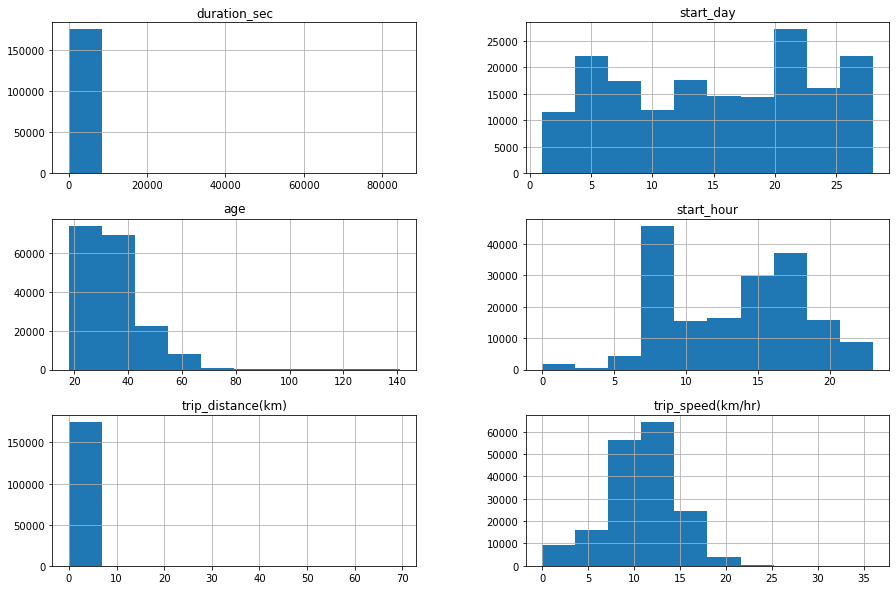

In [25]:
# a histogram of all the numeric variable
gobike.hist(figsize = (15,10));

I will take a deeper look into the distribution of the variables using matplotlob and seaborn

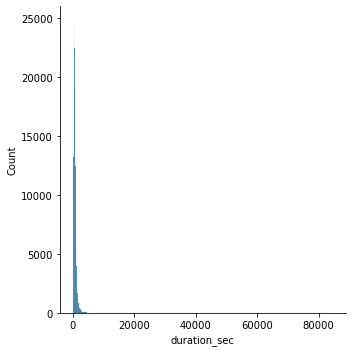

In [26]:
# distribution of the duration sec on a normal scale

bin_edges = np.arange(0, gobike.duration_sec.max() + 100 , 100 )
sb.displot(gobike.duration_sec, bins = bin_edges, kde = False);

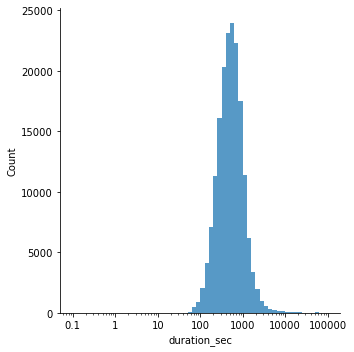

In [27]:
 # the distribution of duration_sec on a log scale

np.log10(gobike.duration_sec.describe()) #transforming the describe() to a scale of log10
bins = 10**np.arange(-1, 5+0.1, 0.1) #setting the bins
# setting the tick locations and labels
ticks = [0.1, 1, 10, 100, 1000, 10000, 100000]
labels = ['{}'.format(v) for v in ticks]
#ploting the distribution on a log scale
sb.displot(gobike.duration_sec, bins = bins, kde = False)
plt.xscale('log')
plt.xticks(ticks, labels);

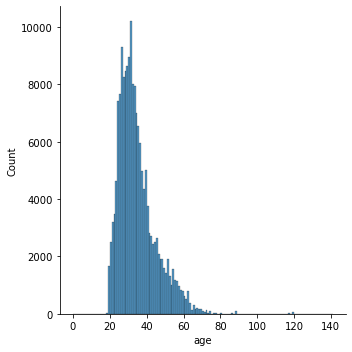

In [28]:
# the age distribution
bin_edges = np.arange(0, gobike.age.max() + 1,1 )
sb.displot(gobike.age, bins = bin_edges, kde = False);


The age distribution of the users shows that most users are between 25 to 40 years old. It also showed a possible outlier. We will remove the outlier by considering only records with less or equal to 80.

In [29]:
gobike.drop(gobike[(gobike.age > 80)].index, inplace = True)

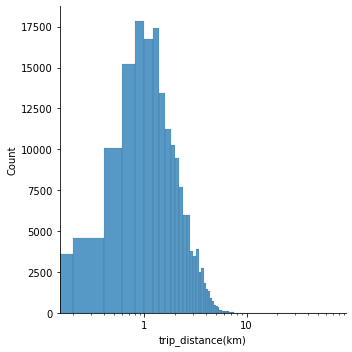

In [30]:
#trip_distance distribution on a log scale

bin_edges = np.arange(0, gobike['trip_distance(km)'].max() + 0.2, 0.2)

# setting the tick locations and labels
ticks = [1, 10]
labels = ['{}'.format(v) for v in ticks]

#ploting the distribution on a log scale
sb.displot(gobike['trip_distance(km)'], bins = bin_edges, kde = False)
plt.xscale('log')
plt.xticks(ticks, labels);

Most trip distance fall between 0 and 2 kilometers

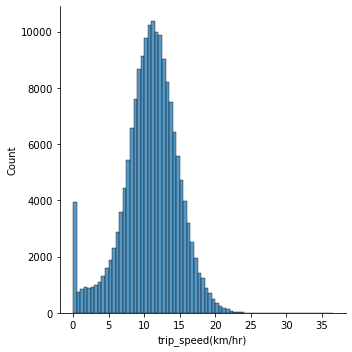

In [31]:
#trip_speed distribution
bin_edges = np.arange(0, gobike['trip_speed(km/hr)'].max()+ 0.5, 0.5)
sb.displot(gobike['trip_speed(km/hr)'], bins = bin_edges, kde = False);

The speed distribution has a fairly normal distribution. After the trips with speed between 0 -0.5, there was a gradual increase in speed ot trips until the maximum speed and then follows a gradual decrease in speed.

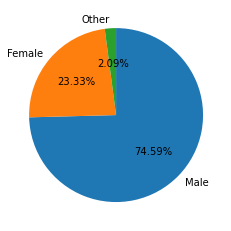

In [32]:
# Gender distribution
summarized_genders = gobike.member_gender.value_counts()
plt.pie(summarized_genders, labels = summarized_genders.index, startangle = 90, counterclock = False, autopct = "%.2f%%");

We have more male riders than any gender. The greater percentage of the riders are males. 

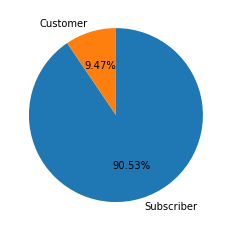

In [33]:
#the user type distribution(pie chart)

summarized_user_type = gobike.user_type.value_counts()
# plotting the pie chart
plt.pie(summarized_user_type, labels = summarized_user_type.index, startangle = 90, autopct = "%.2f%%", counterclock = False);

90.53 percent of the users are subscribers while 9.47 percent of the users are customers.

In the bivariate exploration, I will like to check the gender distribution of the different user_types (subscribers and customers) 

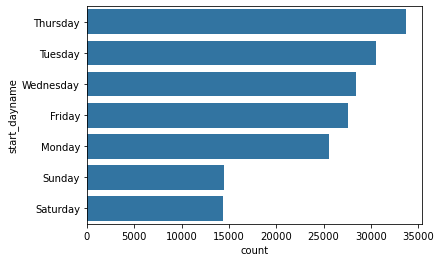

In [34]:
# Day distribution ( most frequent day)(bar_chart)
base_color = sb.color_palette()[0]
day_freq = gobike.start_dayname.value_counts()
day_order = day_freq.index
sb.countplot(data = gobike , y = 'start_dayname', color = base_color, order = day_order);

Most trips were taken on weekdays with Thursday as the highest. Properly the users use the bike to go to work. Saturday and Sundays had the least counts. 

In the bivariate exploration I will like to find out the duration or distance of the trips taken on each day

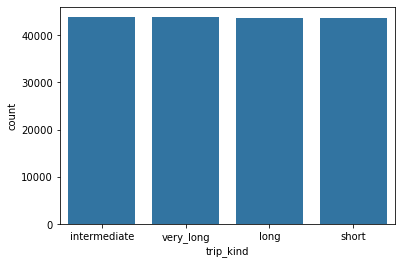

In [35]:
freq = gobike.trip_kind.value_counts()
order = freq.index
sb.countplot(data = gobike, x = 'trip_kind', color = base_color, order = order);

Most trips were intermediate trips followed by very long trips and long trips then short trips. But the discrepancy between the trip kinds is small.

# Distributions of some variables of interest.

> The distribution of the duration_sec and the distance had some unusual points. They were highly skewed to the right with long tails. However, after applying a logarithmic transformation to the plot, they followed a normal distribution.

### Additional operation done on the data to tidy the data and why I did it

> The age distribution of the users shows that most users are between 25 to 40 years old. However, It also showed a possible outlier. Which was removed by considering only records with age less or equal to 80. I did this because the percentage of the null records against the whole data is infinitesimal and would have little or no effect on the result of the analysis

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [36]:
numeric_vars = ['duration_sec', 'trip_distance(km)', 'trip_speed(km/hr)', 'age']
categoric_vars = ['user_type', 'route', 'member_gender', 'start_dayname']

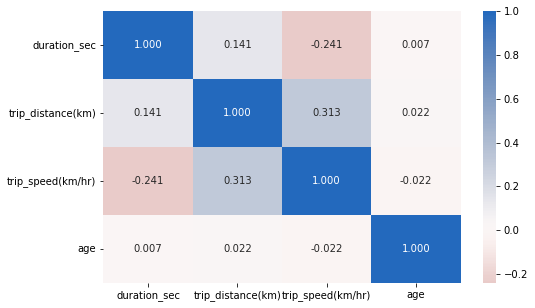

In [37]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(gobike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [38]:
gobike.shape

(174760, 10)

gobike.shape= (174760, 10)
gobike_samp.shape= (10000, 10)


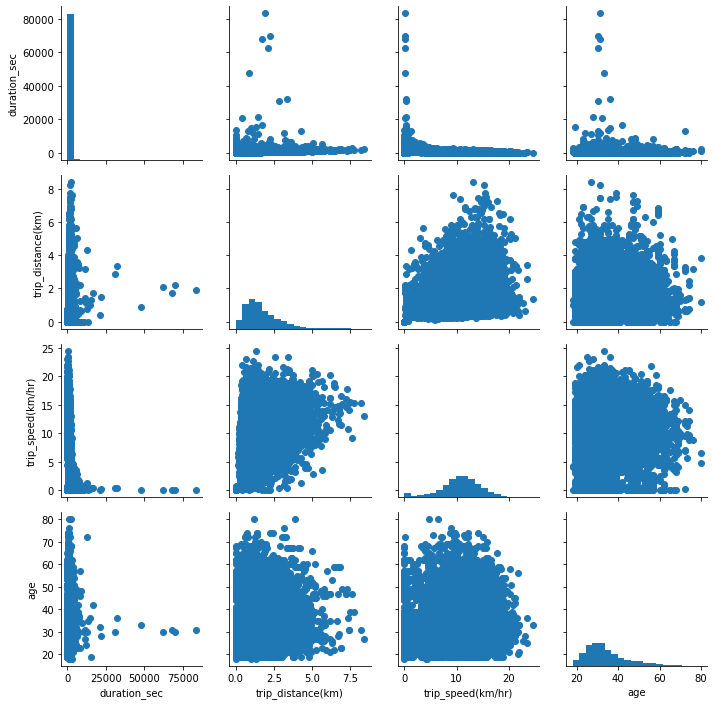

In [39]:
# plot matrix: sample 10000 trips so that plots are clearer and they render faster
print("gobike.shape=",gobike.shape)
gobike_samp = gobike.sample(n=10000, replace = False)
print("gobike_samp.shape=",gobike_samp.shape)

g = sb.PairGrid(data = gobike_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

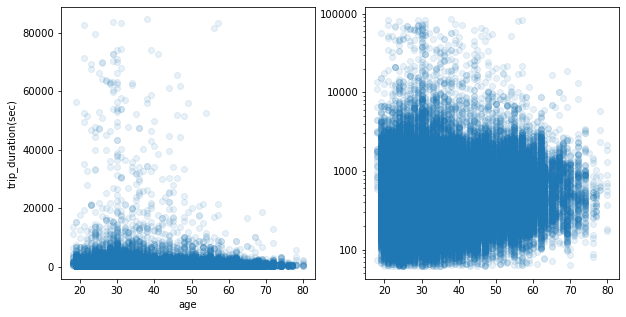

In [40]:
# age and trip duration
plt.figure(figsize = [10,5])

plt.subplot(1,2,1)
plt.scatter(data = gobike, y = 'duration_sec', x = 'age', alpha = 1/10)
plt.xlabel('age')
plt.ylabel('trip_duration(sec)');

plt.subplot(1,2,2)

bins = 10**np.arange(-1, 5+0.1, 0.1) #setting the bins
# setting the tick locations and labels
ticks = [100, 1000, 10000, 100000]
labels = ['{}'.format(v) for v in ticks]


#ploting the distribution on a log scale
plt.scatter(data = gobike, y = 'duration_sec', x = 'age', alpha = 1/10)
plt.yscale('log')
plt.yticks(ticks, labels);


The two plots show a somewhat inverse relationship between the two variables, trip duration and age. Since the data points are enormous, a heatmap might help clarify this point. 

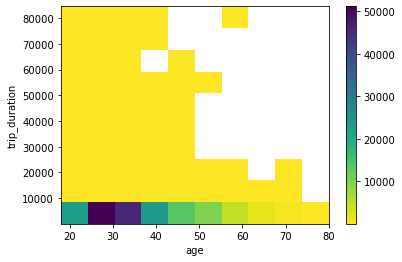

In [41]:
plt.hist2d(data = gobike, y = 'duration_sec', x = 'age', cmin = 0.5, cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('age')
plt.ylabel('trip_duration');

The heatmap gracioulsly shows that most trips were taken by users around 25 to 35 years. It also shows an inverse relationship between the two variables, age and trip duration starting from about age 40. From age 40 through 80, there was a gradual decrease in trip duration among user.

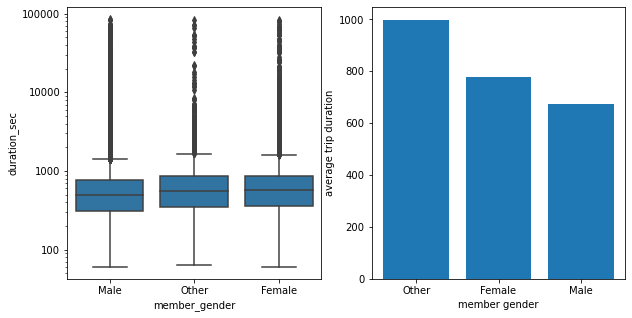

In [42]:
# gender and trip_duration
plt.figure(figsize= [10,5])

plt.subplot(1,2,1)

sb.boxplot(data = gobike, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.yscale('log')
# setting the tick locations and labels
ticks = [100, 1000, 10000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

plt.subplot(1,2,2)
# average trip duration against member gender
#grouping the data by member_gender
first = gobike.groupby('member_gender')['duration_sec'].mean().sort_values(ascending = False)

plt.bar(first.index, first.values)
plt.ylabel('average trip duration')
plt.xlabel('member gender');

Though the 'female' gender had a higher median trip duration, the 'other' gender has the highest average trip duration, followed by the female gender then the male gender. 

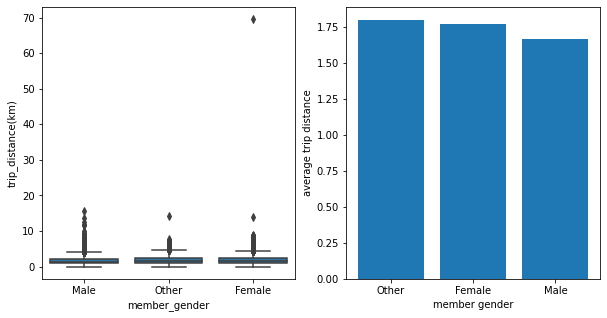

In [43]:
# gender and distance
plt.figure(figsize = [10,5])

plt.subplot(1,2,1)
sb.boxplot(data = gobike, x = 'member_gender', y = 'trip_distance(km)', color = base_color)

plt.subplot(1,2,2)
# average trip distance against member gender
#grouping the data by member_gender
second = gobike.groupby('member_gender')['trip_distance(km)'].mean().sort_values(ascending = False)

plt.bar(second.index, second.values)
plt.ylabel('average trip distance')
plt.xlabel('member gender');

The three gender category mainly undergo a relative same distance trip but the trip with the longest distance was undergone by a female. On the average, most long trips were taken by the 'Other' followed by Female gender then the Male gender.

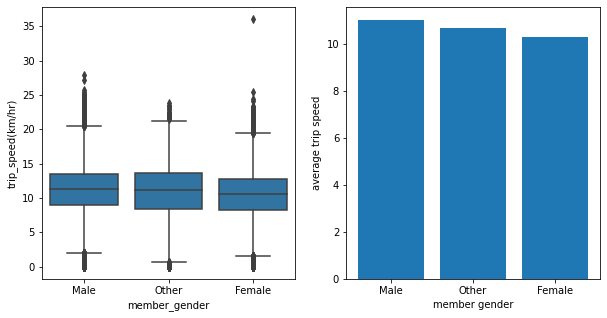

In [44]:
# gender and speed
plt.figure(figsize = [10,5])

plt.subplot(1,2,1)
sb.boxplot(data = gobike, x = 'member_gender', y = 'trip_speed(km/hr)', color = base_color);

plt.subplot(1,2,2)
# average trip speed against member gender
#grouping the data by member_gender
third = gobike.groupby('member_gender')['trip_speed(km/hr)'].mean().sort_values(ascending = False)

plt.bar(third.index, third.values)
plt.ylabel('average trip speed')
plt.xlabel('member gender');

Males have higher median speed but the fastest trip was done by a female.On the average, the Male gender had the most fastest trips. 

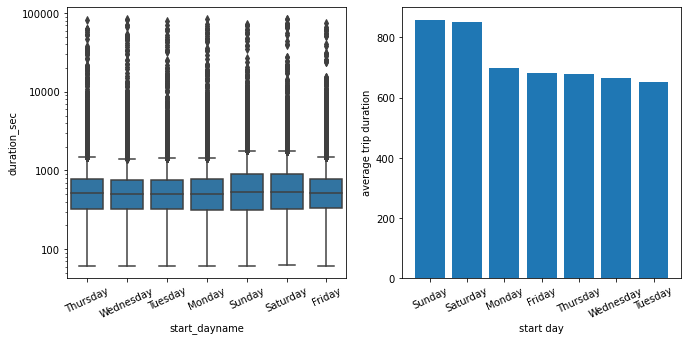

In [45]:
#Day and trip duration

plt.figure(figsize = [11,5])

plt.subplot(1,2,1)

sb.boxplot(data = gobike, x = 'start_dayname', y = 'duration_sec', color = base_color)
plt.yscale('log')
# setting the tick locations and labels
ticks = [100, 1000, 10000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation = 25);

plt.subplot(1,2,2)

# average trip duration against start_day
#grouping the data by start day
sd = gobike.groupby('start_dayname')['duration_sec'].mean().sort_values(ascending = False)

#ploting the bar graph
plt.bar(sd.index, sd.values)
plt.xlabel('start day')
plt.ylabel('average trip duration')
plt.xticks(rotation = 25);



From the trip duration distribution of the trip start days, though weekdays have more trips, users go for longer trips on saturday and Sundays(weekends). The bar plot confirms that longer trips are generally taken in the weekends with sunday being the highest

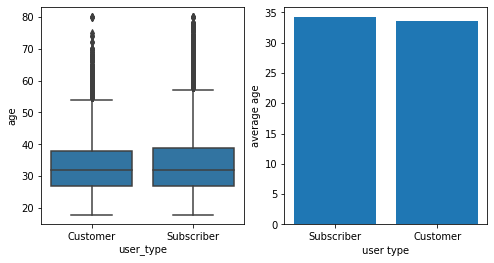

In [46]:
# user_type and age
plt.figure(figsize = [8,4])

plt.subplot(1,2,1)
sb.boxplot(data = gobike, x = 'user_type', y = 'age', color = base_color);

plt.subplot(1,2,2)
ua = gobike.groupby('user_type')['age'].mean().sort_values(ascending = False)
plt.bar(ua.index, ua.values)
plt.xlabel('user type')
plt.ylabel('average age');

The suscribers and the customers have roughly the same median age but the subscribers have a higher 75 percent quantile and higher max. The subscribers have a higher average age than the customers


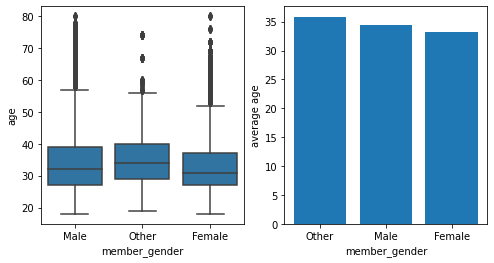

In [47]:
#gender and age
plt.figure(figsize = [8,4])

plt.subplot(1,2,1) # age distribution of the members gender
sb.boxplot(data = gobike, x = 'member_gender', y = 'age', color = base_color);

plt.subplot(1,2,2) # average age of the members gender
ua = gobike.groupby('member_gender')['age'].mean().sort_values(ascending = False)
plt.bar(ua.index, ua.values)
plt.xlabel('member_gender')
plt.ylabel('average age');


The female gender has more of the youngest users. Their median age is below that of the male and the other gender. The users in the 'other' gender are generally older with a median age and mean age higher than the female and male gender.

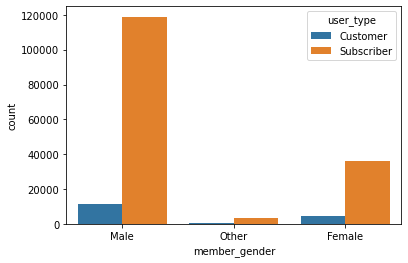

In [48]:
# user type and gender  
sb.countplot(data = gobike, x = 'member_gender', hue = 'user_type');

It has been established that we have more male users; a deeper look now reveals that a greater percentage of them are subscribers. This trend follows through all the genders.

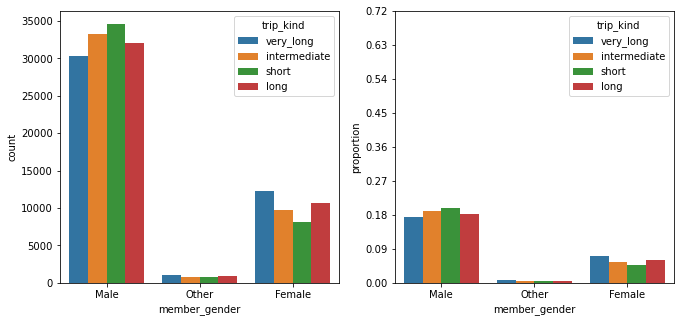

In [49]:
plt.figure(figsize = [11,5])

plt.subplot(1,2,1)# trip_kind and gender(count)
sb.countplot(data = gobike, x = 'member_gender', hue = 'trip_kind')

plt.subplot(1,2,2)# trip_kind and gender (proportion)
n_gender = gobike.member_gender.value_counts().sum()
max_gender_count = gobike.member_gender.value_counts()[0]
max_prop = max_gender_count/n_gender

# Using numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 9\%
tick_props = np.arange(0, max_prop, 0.09)
tick_props

# Using a list comprehension to create tick_names that we will apply to the tick labels. 
# the for loop picks each element `v` from the `tick_props`, and convert it into a formatted string.
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

# plotting the proportion
sb.countplot(data = gobike, x = 'member_gender', hue = 'trip_kind')

# Change the tick locations and labels
plt.yticks(tick_props * n_gender, tick_names)
plt.ylabel('proportion');


Of the trips undergone by the male gender, short trips had the highest count followed by the intermediate trips, then long trips and finally very long trips. The female and the 'Other' gender, however, followed the reverse order with very_long trips as trips with the most count, followed by long trips, then intermediate trips and lastly, short trips. Their proportions also followed the same trend.

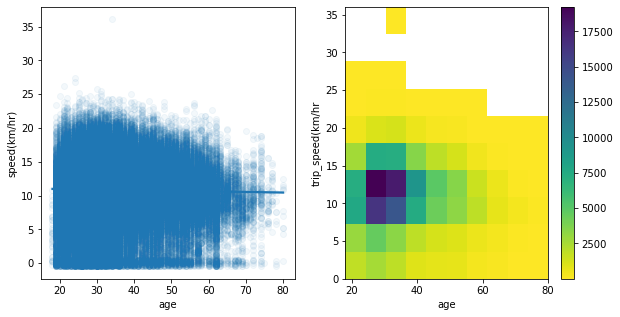

In [50]:
# Age and speed
plt.figure(figsize =[10,5])

plt.subplot(1,2,1) # scatter plot of age and speed
sb.regplot(data = gobike, x = 'age', y = 'trip_speed(km/hr)', y_jitter = 0.5, scatter_kws = {'alpha': 1/20})
plt.xlabel('age')
plt.ylabel('speed(km/hr)');

plt.subplot(1,2,2) # histogram of speed and age

h2d = plt.hist2d(data = gobike, y = 'trip_speed(km/hr)', x = 'age', cmin = 1, cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('age')
plt.ylabel('trip_speed(km/hr');

Trip speed gradually decreased with age. Trips with speed between 10 and 15 km/hr and users age between 25 and 35 years had the highest count

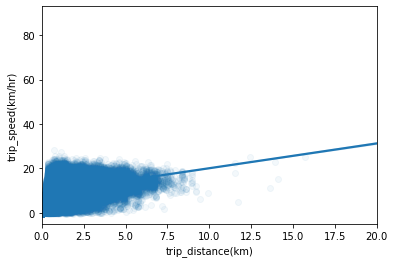

In [51]:
#Distance and speed
sb.regplot(data = gobike, x = 'trip_distance(km)', y = 'trip_speed(km/hr)', y_jitter = 0.5, scatter_kws = {'alpha': 1/20})
plt.xlabel('trip_distance(km)')
plt.ylabel('trip_speed(km/hr)')
plt.xlim(0, 20);

There is a positive corellation between trip speed and distance. As the trip distance increase the trip speed increase likewise

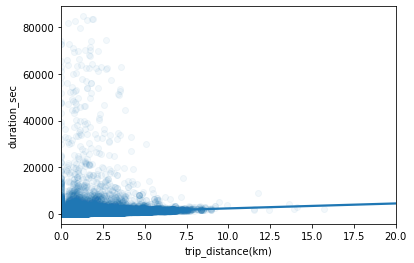

In [52]:
#Distance and duration_sec
sb.regplot(data = gobike, x = 'trip_distance(km)', y = 'duration_sec', y_jitter = 0.5, scatter_kws = {'alpha': 1/20})
plt.xlabel('trip_distance(km)')
plt.ylabel('duration_sec')
plt.xlim(0, 20);



There is a modest positive relationship between trip distance and trip duration.

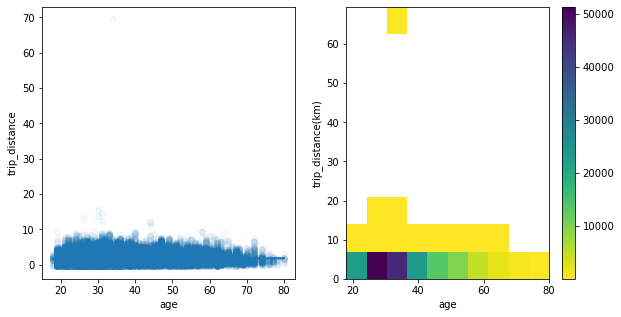

In [53]:
# age and distance
plt.figure(figsize = [10,5])

plt.subplot(1,2,1)
sb.regplot(data = gobike, x = 'age', y = 'trip_distance(km)', y_jitter = 0.5, scatter_kws = {'alpha': 1/20})
plt.xlabel('age')
plt.ylabel('trip_distance');

plt.subplot(1,2,2)
h2d = plt.hist2d(data = gobike, y = 'trip_distance(km)', x = 'age', cmin = 0.1, cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('age')
plt.ylabel('trip_distance(km)');

Age had a very minimal effect on distance of trips. Older users also went for some long distance. There was an initial increase in the trip distance from age 20 to 35 then a decline in the distance as age increases from 30. 

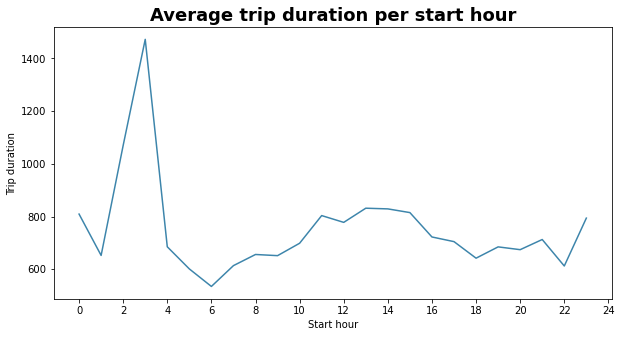

In [54]:
gobike.groupby('start_hour')['duration_sec'].mean().plot(kind='line', figsize=(10,5) ,color='#3d85ab')
plt.title('Average trip duration per start hour' , fontsize=18 , fontweight='bold')
plt.ylabel('Trip duration')
plt.xlabel('Start hour')
plt.xticks([x for x in range(0,25, 2)])
plt.yticks(rotation=360);
plt.show()

Most long trips are started between 1 am and 4 am in the morning.

### Some relationships  and interactions of Features from the bivariate exploration

* The was a negative relationhip between trip duration and age. After the maximum trip duration, the trip duration declined with increase in age of riders
* The trip speed also declined with increase in age of the riders of the riders after the maximum speed
* There was an initial increase in the trip distance from age 20 to 30 then a decline in the distance as age increases from 30.
* Unexpectedly, the female gender has more longer rides than the other genders. They have a higher median duration_sec score than the other genders
* Though weekdays have more trips, users go for longer trips on saturday and Sundays(weekends).
* Males have higher median speed but the fastest trip was done by a female

### Interesting relationships observed

* It has been established that we have more male users; a deeper look now reveals that a greater percentage of them are subscribers. This trend follows through all the genders.
* The female gender has more of the youngest users. Their median age is below that of the male and the other gender. The users in the male gender are generally older with a median age higher than the female and male gender.
* Of the trips undergone by the male gender, short trips had the highest count followed by the intermediate trips, then long trips and finally very long trips. The female and the 'Other' gender, however, followed the reverse order with very_long trips as trips with the most count, followed by long trips, then intermediate trips and lastly, short trips. Their proportions also followed the same trend.
* The suscribers and the customers have roughly the same median age but the subscribers have a higher 75 percent quantile and higher max.

## Multivariate Exploration


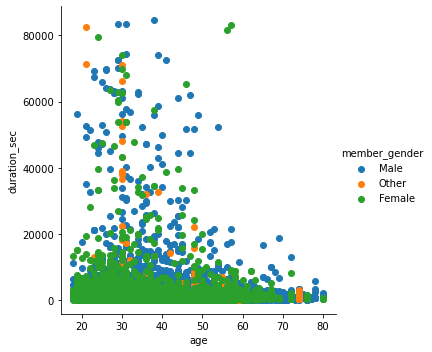

In [55]:
g = sb.FacetGrid(data = gobike, hue = 'member_gender', height = 5)
g.map(plt.scatter, 'age', 'duration_sec')
g.add_legend();


From the positional encodings in the plot, you can see that there is a modest negative relationship between age and trip duration from users 40 years of old through 80. Adding the member gender via shape encoding, we can see that the 'Other' gender have the more of the trips with low duration, followed by the 'Female' gender. Most trips with high durations were undergone by the 'Male' gender.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


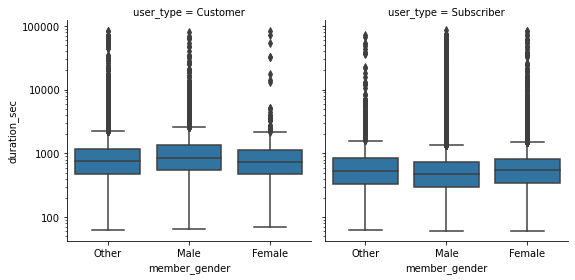

In [56]:
# gender and duration, user type
g = sb.FacetGrid(data = gobike, col = 'user_type', height = 4)
g.map(sb.boxplot, 'member_gender', 'duration_sec')
plt.yscale('log')

# setting the ticks
ticks = [100, 1000, 10000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

The faceted box plot shows a somewhat different trend between the subscribers and the customers. The male gender in the customer level tends to have the highest trip duration while the male gender in the suscriber level tend to have the trips with the least duration.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1440x1080 with 0 Axes>

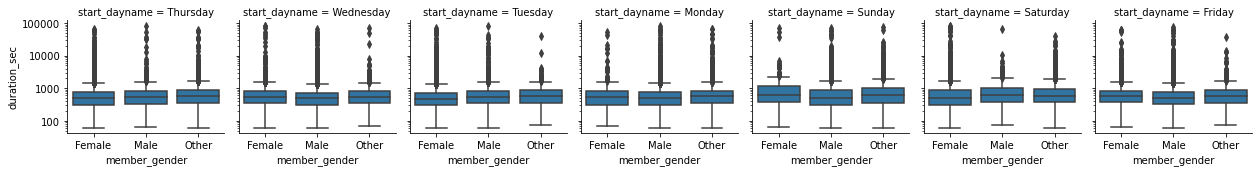

In [57]:
# gender and duration, start_dayname
plt.figure(figsize = [20,15]);

g = sb.FacetGrid(data = gobike, col = 'start_dayname', height = 2.5)
g.map(sb.boxplot, 'member_gender', 'duration_sec')
plt.yscale('log')

# setting the ticks
ticks = [100, 1000, 10000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

### Relationships observed from the multivariate exploration.

 1. Age had a slightly negative correlation with trip duration as expected. Users abput 35 years and above tend to go for shorter trips. Of the three gender category, the other gender tend to have the most trips with short duration, followed by the female gender and lastly, the male gender, which has the most trips with the highest duration.
 
2. Customers generally tend to go for trips with higher trip duration than subcribers. But the male gender in the customer level tends to have the highest trip duration while the male gender in the suscriber level tend to have the trips with the least duration.

3. Trips with longer duration is embarked on mainly in weekends. Facetting trip_duration againt gender among the start days. The 'Other' gender tend to have more trips with longer duration than the male and female genders during the weekdays while during weekends, on saturday, the Male gender has the most trips with long durations and on sunday, the female gender has them.


## Conclusions

> Looking back on the plots, the users characteristics that affect trip duration, speed and distance are mainly age and gender. Start hour and day also affects trip duration as longer trips were taken in the weekends and starts  mostly around 1 -3 am. Age had minimal effect on the trip distance as older users go for long trips too. The user type also tend to affect trip duration as customers have generally longer trips than subscribers
